<a href="https://colab.research.google.com/github/Sewanmpm/SlumImprovment/blob/main/roadshadow_connection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python numpy


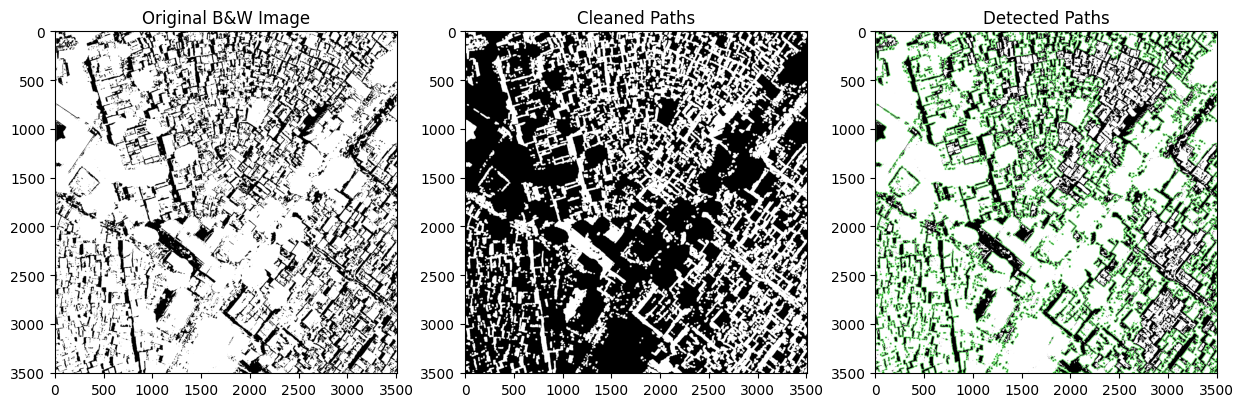

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your black-and-white image where shadows are black
image_path = '/root/ground road.png'  # Update this to your image's file path
bw_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Assuming black (low intensity) represents shadows in your image
# You may need to invert the image if white represents shadows
# Uncomment the following line to invert the image if necessary
# bw_image = 255 - bw_image

# Identify potential paths by isolating dark (black) regions
# Since your image is already a mask, this might be unnecessary,
# but you can apply additional thresholds if needed to refine it:
_, paths_mask = cv2.threshold(bw_image, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations to clean up noise and enhance path structures
kernel = np.ones((5, 5), np.uint8)  # You can adjust the kernel size as needed
cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)
cleaned_paths = cv2.dilate(cleaned_paths, kernel, iterations=2)  # Increase path width

# Optionally, find contours (which could represent paths)
contours, _ = cv2.findContours(cleaned_paths, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image for visualization
contour_img = cv2.cvtColor(bw_image, cv2.COLOR_GRAY2BGR)  # Convert to BGR to draw colored contours
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)  # Draw contours in green

# Show the original and processed images
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(bw_image, cmap='gray')
plt.title('Original B&W Image')
plt.subplot(1, 3, 2)
plt.imshow(cleaned_paths, cmap='gray')
plt.title('Cleaned Paths')
plt.subplot(1, 3, 3)
plt.imshow(contour_img)
plt.title('Detected Paths')
plt.show()


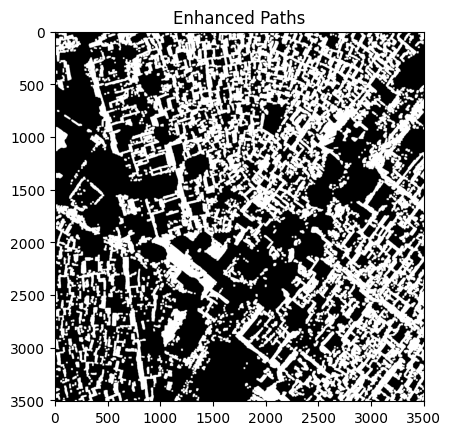

In [27]:
kernel_size = 3  # Try different sizes: 3, 5, 7
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Assuming 'cleaned_paths' is your initial path image after initial processing
# Modify these as per your situation
enhanced_paths = cv2.morphologyEx(cleaned_paths, cv2.MORPH_CLOSE, kernel)
enhanced_paths = cv2.dilate(enhanced_paths, kernel, iterations=1)  # Make paths broader

# Visualize the result to check the paths
plt.imshow(enhanced_paths, cmap='gray')
plt.title('Enhanced Paths')
plt.show()


In [23]:
# Further noise reduction (if necessary)
kernel = np.ones((5, 5), np.uint8)  # Adjust kernel size as needed
denoised_paths = cv2.morphologyEx(cleaned_paths, cv2.MORPH_CLOSE, kernel)
denoised_paths = cv2.morphologyEx(denoised_paths, cv2.MORPH_OPEN, kernel)

In [24]:
# Enhance and smooth paths
large_kernel = np.ones((10, 10), np.uint8)  # Adjust size to your needs
smoothed_paths = cv2.morphologyEx(denoised_paths, cv2.MORPH_CLOSE, large_kernel)


In [25]:
# Skeletonize paths to get single-pixel wide lines
from skimage.morphology import skeletonize
# Convert to boolean image for skeletonization
binary_paths = smoothed_paths > 0  # Adjust threshold if needed
skeleton_paths = skeletonize(binary_paths)
skeleton_paths = skeleton_paths.astype(np.uint8) * 255  # Convert back to binary image


In [26]:
# Find contours on the refined path image
contours, _ = cv2.findContours(skeleton_paths, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Draw new contours
final_contour_img = cv2.cvtColor(skeleton_paths, cv2.COLOR_GRAY2BGR)  # Convert to BGR for colored contours
cv2.drawContours(final_contour_img, contours, -1, (0, 255, 0), 1)  # Draw contours in green


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

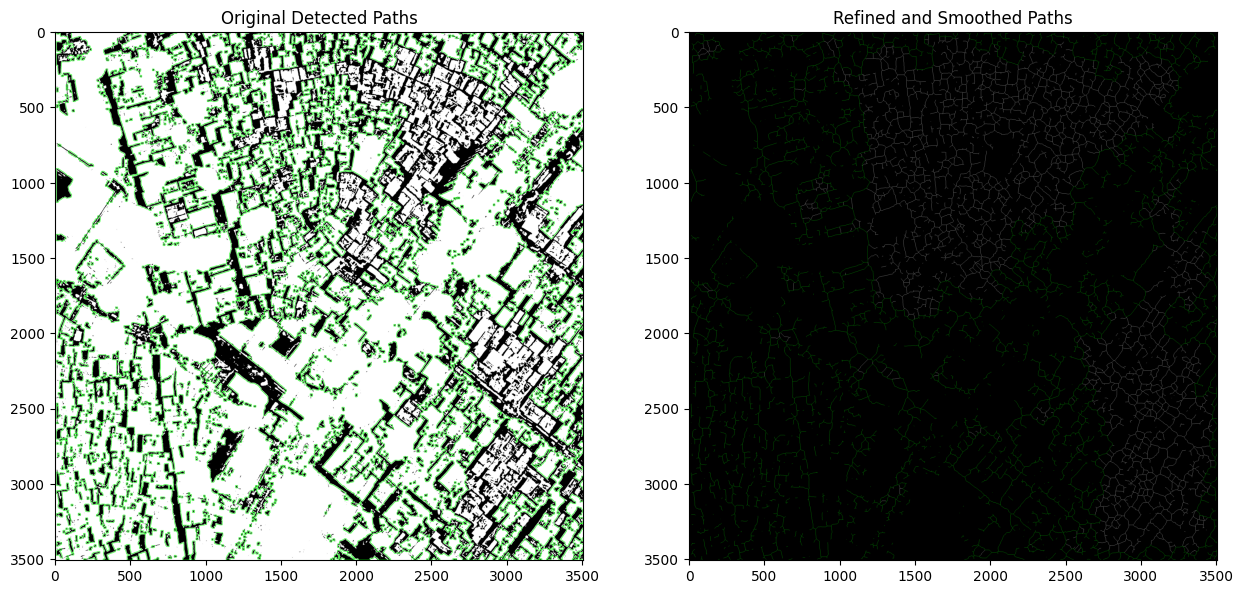

In [22]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(contour_img)  # Original detected paths
plt.title('Original Detected Paths')
plt.subplot(1, 2, 2)
plt.imshow(final_contour_img)
plt.title('Refined and Smoothed Paths')
plt.show()
